In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/PROJECT/HEART%20DISEASE/heart_disease_uci.csv')

In [42]:
df['chol'] = df['chol'].replace(0, np.nan)

### <span style="color:cyan"><i>Data Cleaning</i></span>

In [4]:
# Percentage data missing from each column: 
total = (df.isnull().sum() / len(df)) * 100 

categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

total


id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

In [6]:
df_dropped = df.dropna()
X = df_dropped[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']]
y = df_dropped['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7833333333333333


In [7]:
X_train_df = pd.DataFrame(X_train, columns=['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'])
X_train_df

,age,trestbps,chol,thalch,oldpeak,ca
6,62,140.0,268.0,160.0,3.6,2.0
185,63,140.0,195.0,179.0,0.0,2.0
187,66,160.0,246.0,120.0,0.0,3.0
147,41,112.0,250.0,179.0,0.0,0.0
30,69,140.0,239.0,151.0,1.8,2.0
...,...,...,...,...,...,...
190,50,129.0,196.0,163.0,0.0,0.0
71,67,125.0,254.0,163.0,0.2,2.0
107,57,128.0,229.0,150.0,0.4,1.0
274,59,134.0,204.0,162.0,0.8,2.0


In [43]:
# Split first to avoid data leakage
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformer
transformer = ColumnTransformer(
    transformers=[
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols),
        ('num', KNNImputer(n_neighbors=3, weights='distance'), numerical_cols)
    ]
)

# Fit and transform on training data only
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)  # Only transform test data

# Create DataFrames ensuring correct column order
features = categorical_cols + numerical_cols  
X_train_df = pd.DataFrame(X_train_transformed, columns=features)
X_test_df = pd.DataFrame(X_test_transformed, columns=features)
X_train_df

,sex,dataset,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalch,oldpeak,ca
0,Male,VA Long Beach,asymptomatic,False,st-t abnormality,True,flat,normal,62.0,128.92461,170.0,120.0,3.0,1.256208
1,Male,Hungary,non-anginal,False,normal,False,flat,normal,54.0,150.0,203.0,122.0,0.0,0.275869
2,Male,VA Long Beach,non-anginal,False,normal,False,flat,normal,51.0,130.0,339.0,107.333333,0.733333,0.0
3,Female,Cleveland,non-anginal,False,normal,False,flat,normal,50.0,120.0,219.0,158.0,1.6,0.0
4,Male,Cleveland,atypical angina,False,normal,False,upsloping,normal,52.0,120.0,325.0,172.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Male,Cleveland,asymptomatic,False,normal,True,upsloping,reversable defect,59.0,140.0,177.0,162.0,0.0,1.0
732,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,upsloping,reversable defect,61.0,140.0,207.0,138.0,1.9,1.0
733,Male,VA Long Beach,asymptomatic,True,normal,True,downsloping,reversable defect,75.0,160.0,310.0,112.0,2.0,2.225386
734,Female,Hungary,atypical angina,False,normal,True,flat,normal,53.0,140.0,216.0,142.0,2.0,0.936101


In [ ]:
X_train_df

In [22]:
X_test_df['thal'].unique()

array(['normal', 'fixed defect', 'reversable defect'], dtype=object)

In [27]:
oridnal_columns = ['cp', 'restecg', 'slope', 'thal']
normal_cat_cols = ['sex', 'dataset', 'fbs', 'exang']

In [28]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[
    ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], 
    ['normal', 'st-t abnormality', 'lv hypertrophy'], 
    ['flat', 'upsloping', 'downsloping'],
    ['normal', 'reversable defect', 'fixed defect']
    ])

# Fit and transform the categorical columns 
X_ordinal_encoded = encoder.fit_transform(X_train_df[oridnal_columns])

from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output=False for dense array

# Fit and transform the data
X_encoded = ohe.fit_transform(X_train_df[normal_cat_cols])

# Convert to DataFrame with proper column names
encoded_columns = ohe.get_feature_names_out(normal_cat_cols)


In [ ]:
X_ordinal_encoded_df = pd.DataFrame(
    X_ordinal_encoded,
    columns=oridnal_columns,  # Make sure this matches your input columns
    index=X_train_df.index
)
X_ordinal_encoded_df

In [31]:
df_encoded = pd.DataFrame(X_encoded, columns=encoded_columns)
df_encoded

,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,fbs_True,exang_True
0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
731,1.0,0.0,0.0,0.0,0.0,1.0
732,1.0,0.0,0.0,0.0,0.0,1.0
733,1.0,0.0,0.0,1.0,1.0,1.0
734,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df_dropped[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']]
y = df_dropped['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['chol'] = np.log1p(X_train['chol'])

# Imputation transform for handling missing categorical values 
trf1 = ColumnTransformer([
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols),     # Filling the missing categorical values with the most frequent value
        ('num', KNNImputer(n_neighbors=3, weights='distance'), numerical_cols)  # Filling the missing numerical values with the mean of the 3 nearest neighbors
])

# Applying the one hot encoding for the categorical columns
trf2 = ColumnTransformer([
        ('ohe', OneHotEncoder(drop='first'), normal_cat_cols)
])

# Applying the ordinal encoding for the ordinal columns
trf3 = ColumnTransformer([
        ('ohe', OrdinalEncoder(categories=[
            ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], 
            ['normal', 'st-t abnormality', 'lv hypertrophy'], 
            ['flat', 'upsloping', 'downsloping'],
            ['normal', 'reversable defect', 'fixed defect']
            ]), oridnal_columns)
])

import numpy as np
df['chol_log'] = np.log1p(df['chol'])  # Use log1p to avoid log(0)
df['ca_log'] = np.log1p(df['ca'])

# Applying the standardscaler for age column 
trf4 = ColumnTransformer([
    ('scaler', StandardScaler(), ['age', 'trestbps', 'chol_log', 'thalch'])
    ('min_max_scaler', MinMaxScaler(), ['oldpeak', 'ca_log']) 
])

In [51]:
X_train['ca'].describe()

count    250.000000
mean       0.688000
std        0.960388
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [37]:
X_train = X_train[X_train['trestbps'] > 0]  # Keep only valid BP values

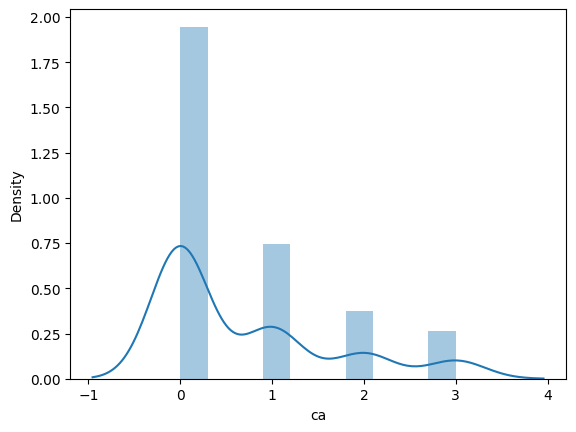

In [50]:
import seaborn as sns 
sns.distplot(X_train['ca'])
plt.show()

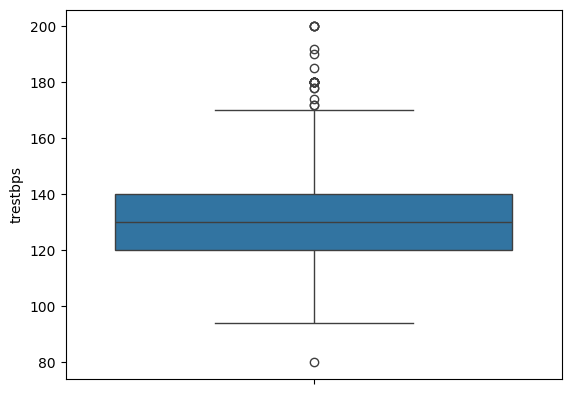

In [39]:
sns.boxplot(X_train['trestbps'])
plt.show()